This notebook is for figuring out how to work with the FMA dataset

In [18]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib
import sklearn
import os.path
import sklearn

In [47]:
features = pd.read_csv("fma_metadata/features.csv", index_col=0, header=[0,1,2])
genres = pd.read_csv("fma_metadata/genres.csv")
tracks = pd.read_csv("fma_metadata/tracks.csv", index_col=0, header=[0,1])

In [48]:
list(features.columns)

[('chroma_cens', 'kurtosis', '01'),
 ('chroma_cens', 'kurtosis', '02'),
 ('chroma_cens', 'kurtosis', '03'),
 ('chroma_cens', 'kurtosis', '04'),
 ('chroma_cens', 'kurtosis', '05'),
 ('chroma_cens', 'kurtosis', '06'),
 ('chroma_cens', 'kurtosis', '07'),
 ('chroma_cens', 'kurtosis', '08'),
 ('chroma_cens', 'kurtosis', '09'),
 ('chroma_cens', 'kurtosis', '10'),
 ('chroma_cens', 'kurtosis', '11'),
 ('chroma_cens', 'kurtosis', '12'),
 ('chroma_cens', 'max', '01'),
 ('chroma_cens', 'max', '02'),
 ('chroma_cens', 'max', '03'),
 ('chroma_cens', 'max', '04'),
 ('chroma_cens', 'max', '05'),
 ('chroma_cens', 'max', '06'),
 ('chroma_cens', 'max', '07'),
 ('chroma_cens', 'max', '08'),
 ('chroma_cens', 'max', '09'),
 ('chroma_cens', 'max', '10'),
 ('chroma_cens', 'max', '11'),
 ('chroma_cens', 'max', '12'),
 ('chroma_cens', 'mean', '01'),
 ('chroma_cens', 'mean', '02'),
 ('chroma_cens', 'mean', '03'),
 ('chroma_cens', 'mean', '04'),
 ('chroma_cens', 'mean', '05'),
 ('chroma_cens', 'mean', '06'),
 ('c

In [38]:
list(tracks.columns)

[('album', 'comments'),
 ('album', 'date_created'),
 ('album', 'date_released'),
 ('album', 'engineer'),
 ('album', 'favorites'),
 ('album', 'id'),
 ('album', 'information'),
 ('album', 'listens'),
 ('album', 'producer'),
 ('album', 'tags'),
 ('album', 'title'),
 ('album', 'tracks'),
 ('album', 'type'),
 ('artist', 'active_year_begin'),
 ('artist', 'active_year_end'),
 ('artist', 'associated_labels'),
 ('artist', 'bio'),
 ('artist', 'comments'),
 ('artist', 'date_created'),
 ('artist', 'favorites'),
 ('artist', 'id'),
 ('artist', 'latitude'),
 ('artist', 'location'),
 ('artist', 'longitude'),
 ('artist', 'members'),
 ('artist', 'name'),
 ('artist', 'related_projects'),
 ('artist', 'tags'),
 ('artist', 'website'),
 ('artist', 'wikipedia_page'),
 ('set', 'split'),
 ('set', 'subset'),
 ('track', 'bit_rate'),
 ('track', 'comments'),
 ('track', 'composer'),
 ('track', 'date_created'),
 ('track', 'date_recorded'),
 ('track', 'duration'),
 ('track', 'favorites'),
 ('track', 'genre_top'),
 ('t

In [39]:
small = tracks['set','subset'] == 'small'
small_tracks = tracks[small]

In [40]:
len(tracks)

106574

In [41]:
len(small_tracks)

8000

In [42]:
small_tracks

album                                                            \
         comments         date_created        date_released        engineer   
track_id                                                                      
2               0  2008-11-26 01:44:45  2009-01-05 00:00:00             NaN   
5               0  2008-11-26 01:44:45  2009-01-05 00:00:00             NaN   
10              0  2008-11-26 01:45:08  2008-02-06 00:00:00             NaN   
140             1  2008-11-26 01:49:59  2007-05-22 00:00:00             NaN   
141             0  2008-11-26 01:49:57  2009-01-16 00:00:00             NaN   
148             0  2008-11-26 01:50:19  2009-01-15 00:00:00             NaN   
182             0  2008-11-26 01:52:18  2005-04-26 00:00:00             NaN   
190             0  2008-11-26 01:52:31  2009-01-07 00:00:00             NaN   
193             0  2008-11-26 01:52:31  2009-01-07 00:00:00             NaN   
194             0  2008-11-26 01:52:31  2009-01-07 00:00:00             NaN   
197             0  2008-11-26 01:52:31  2009-01-07 00:00:00             NaN   
200             0  2008-11-26 01:52:31  2009-01-07 00:00:00             NaN   
203             0  2008-11-26 01:52:31  2009-01-07 00:00:00             NaN   
204             0  2008-11-26 01:52:31  2009-01-07 00:00:00             NaN   
207             0  2008-11-26 01:52:31  2009-01-07 00:00:00             NaN   
210             0  2008-11-26 01:52:31  2009-01-07 00:00:00             NaN   
211             0  2008-11-26 01:52:31  2009-01-07 00:00:00             NaN   
212             0  2008-11-26 01:52:31  2009-01-07 00:00:00             NaN   
213             0  2008-11-26 01:53:47  2007-07-05 00:00:00             NaN   
255             0  2008-11-26 01:55:44  2009-01-09 00:00:00             NaN   
256             0  2008-11-26 01:56:04  2009-01-08 00:00:00             NaN   
368             0  2008-11-26 01:58:50  2009-01-01 00:00:00             NaN   
424             0  2008-11-26 02:03:18  2009-01-08 00:00:00             NaN   
459             1  2008-11-26 02:05:26  2009-01-07 00:00:00             NaN   
534             0  2008-11-26 02:07:50  2009-01-14 00:00:00             NaN   
540             0  2008-11-26 02:07:50  2009-01-14 00:00:00             NaN   
546             0  2008-11-26 02:07:50  2009-01-14 00:00:00             NaN   
574             0  2008-11-26 02:09:21  2009-01-08 00:00:00             NaN   
602             0  2009-01-07 08:52:30  2007-12-04 00:00:00             NaN   
615             0  2008-11-26 02:11:16  2009-01-08 00:00:00             NaN   
...           ...                  ...                  ...             ...   
152103          0  2017-02-12 08:25:58                  NaN             NaN   
152253          0  2017-02-12 16:12:46                  NaN             NaN   
152254          0  2017-02-12 16:12:46                  NaN             NaN   
152258          0  2017-02-12 16:12:46                  NaN             NaN   
152261          0  2017-02-12 16:12:46                  NaN             NaN   
152262          0  2017-02-12 16:12:46                  NaN             NaN   
152324          0  2017-02-13 16:02:27                  NaN             NaN   
152418          0  2017-02-14 19:54:53                  NaN             NaN   
152425          0  2017-02-14 20:01:52                  NaN             NaN   
152480          1  2016-07-25 11:19:00                  NaN   Andy G. Cohen   
152543          0  2017-02-15 14:47:38                  NaN             NaN   
152545          0  2017-02-15 14:47:38                  NaN             NaN   
152568          0  2017-02-15 15:49:58                  NaN             NaN   
152569          0  2017-02-15 15:49:58                  NaN             NaN   
152570          0  2017-02-15 15:49:58                  NaN             NaN   
153337          0  2017-02-22 18:05:53                  NaN             NaN   
153383          0  2017-02-23 08:56:45                  NaN   

In [43]:
small_tracks.head()

album                                                     \
         comments         date_created        date_released engineer   
track_id                                                               
2               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
5               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
10              0  2008-11-26 01:45:08  2008-02-06 00:00:00      NaN   
140             1  2008-11-26 01:49:59  2007-05-22 00:00:00      NaN   
141             0  2008-11-26 01:49:57  2009-01-16 00:00:00      NaN   

                                                                           \
         favorites  id                                        information   
track_id                                                                    
2                4   1                                            <p></p>   
5                4   1                                            <p></p>   
10               4   6                                                NaN   
140              1  61  <p>Alec K. Redfearn &amp; The Eyesores: Ellen ...   
141              1  60  <p>A full ensamble of strings, drums, electron...   

                                                       ...       track  \
         listens                        producer tags  ... information   
track_id                                               ...               
2           6073                             NaN   []  ...         NaN   
5           6073                             NaN   []  ...         NaN   
10         47632                             NaN   []  ...         NaN   
140         1300  Alec K. Refearn, Rob Pemberton   []  ...         NaN   
141         1304                             NaN   []  ...         NaN   

                                 \
         interest language_code   
track_id                          
2            4656            en   
5            1933            en   
10          54881            en   
140          1593            en   
141           839            en   

                                                                              \
                                                    license listens lyricist   
track_id                                                                       
2         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1293      NaN   
5         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1151      NaN   
10        Attribution-NonCommercial-NoDerivatives (aka M...   50135      NaN   
140       Attribution-Noncommercial-No Derivative Works ...    1299      NaN   
141       Attribution-Noncommercial-No Derivative Works ...     725      NaN   

                                                    
         number publisher tags               title  
track_id                                            
2             3       NaN   []                Food  
5             6       NaN   []          This World  
10            1       NaN   []             Freeway  
140           2       NaN   []  Queen Of The Wires  
141           4       NaN   []                Ohio  

[5 rows x 52 columns]

In [44]:
electronic = small_tracks[small_tracks['track','genre_top'] == 'Electronic']

In [45]:
len(electronic)

1000

In [46]:
electronic['track','title']

track_id
1482                                 Reindeer Dance
3573                                        Piggled
4519                                         Golden
4520                     From Stardust to Sentience
4521                                          Namer
4522                                        Oceanus
7011                          in sleepy electricity
11206                                         Elles
11262                                  Wataridori 2
11942                            Rage Against Death
12189                                 Ultraviolence
13474                                          Then
13562                                It's Not Jazzz
13571                              Pour Petite Tete
13668                      No Time For Lookin' Back
13706            Love Crime (Qwertypak Venom Remix)
13707                                 For Newspress
13708                                  Disk Machine
13709                                        Member
137

Converting audio in the fma_small folder to spectrogram

In [32]:
FILENAME = "fma_small/000/000005.mp3"
def make_spect(filename):
    y, sr = librosa.load(FILENAME) # (y, sampling rate of y)
    spect = librosa.feature.melspectrogram(y=y, sr=sr,n_fft=2048, hop_length=512)
    spect = librosa.power_to_db(spect, ref=np.max)
    return spect
    
def display_spect(spect):
    librosa.display.specshow(spect)

In [33]:
spect = make_spect(FILENAME)

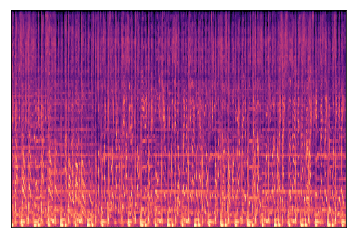

In [34]:
display_spect(spect)

In [ ]:
def train_classifier(clf, X_train, y_train):
    clf.fit(X_train, y_train)